<a href="https://colab.research.google.com/github/moaaztaha/Comparing-BLEU-scores-with-and-without-Arabert-preprocessing/blob/main/Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import os

In [51]:
!git clone https://github.com/aub-mind/arabert
!git clone https://github.com/moaaztaha/Comparing-BLEU-scores-with-and-without-Arabert-preprocessing
os.system("mv  -v /content/Comparing-BLEU-scores-with-and-without-Arabert-preprocessing/* .")
!pip install -r requirements.txt

fatal: destination path 'arabert' already exists and is not an empty directory.
fatal: destination path 'Comparing-BLEU-scores-with-and-without-Arabert-preprocessing' already exists and is not an empty directory.


In [52]:
# Modules
import ipywidgets as widgets
from ipywidgets import interact_manual
import matplotlib.pyplot as plt
import pandas as pd

# needed to use matplotlib with jupyter widgets
%matplotlib notebook

from IPython.display import display, clear_output, Image
import warnings
warnings.filterwarnings("ignore")

from utils import calculate_scores
%matplotlib inline

In [57]:
# Create the widgets
left = widgets.Button(description='Left')
right = widgets.Button(description='Right')
out = widgets.Output()

# test on flickr test set
DATA_PATH = 'test_images/'
DF_PATH = 'ar_data.json'
full_df = pd.read_json('results_comparison.json')

# # test sample of 200 image
# DATA_PATH = 'images_200/'
# DF_PATH = 'sm_ar_data.json'
# full_df = pd.read_json('results_comparison_200.json')

print(full_df.shape)
# Setting the first and last indexs
i=0 # starting index
i_max = full_df.shape[0] # ending index


with out:
    clear_output()
    display(Image(f'{DATA_PATH}/{full_df.iloc[i, 0]}'))
    display(full_df.iloc[i:i+1].drop('file_name', axis=1))
    display(calculate_scores(full_df.iloc[i], DF_PATH))

# plots the next image
def plot_next(*args):
    global i
    i += 1
    # stop
    if i >= i_max: 
        i=0

    with out:
        clear_output()
        display(Image(f'{DATA_PATH}/{full_df.iloc[i, 0]}'))
        display(full_df.iloc[i:i+1].drop('file_name', axis=1))
        display(calculate_scores(full_df.iloc[i], DF_PATH))

def plot_previous(*args):
    global i
    i -= 1
    # stop
    if i < 0: 
        i = full_df.shape[0] -1

    with out:
        clear_output()
        display(Image(f'{DATA_PATH}/{full_df.iloc[i, 0]}'))
        display(full_df.iloc[i:i+1].drop('file_name', axis=1))
        display(calculate_scores(full_df.iloc[i], DF_PATH))
    
    
# attaching the buttons to their callback functions         
right.on_click(plot_next)
left.on_click(plot_previous)

# showing the widgets
vb1 = widgets.VBox([right, left])
vb2 = widgets.VBox([out])
widgets.HBox([vb1, vb2])

(975, 7)


In [58]:
calculate_scores(full_df.iloc[i], DF_PATH, manu=True)

(['old model with old preprocessing',
  'new model with arabert preprcessing',
  'old model with arabert preprocessing',
  'new model with old preprocessing'],
 [42.857, 63.339, 44.485, 11.809],
 [37.796, 56.427, 42.203, 23.618],
 [30.571, 47.627, 34.411, 29.757],
 [41.113, 40.881, 42.501, 33.401])

In [59]:
from tqdm import tqdm
import matplotlib.pyplot as plt

100%|██████████| 975/975 [04:02<00:00,  4.01it/s]


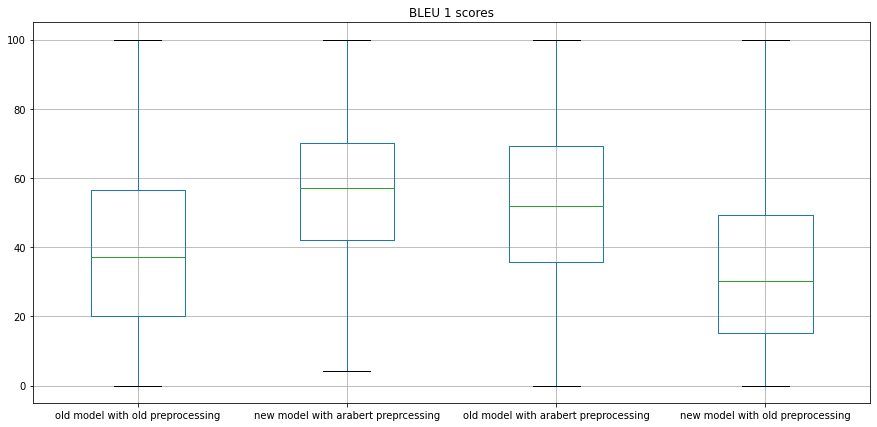

100%|██████████| 975/975 [04:01<00:00,  4.05it/s]


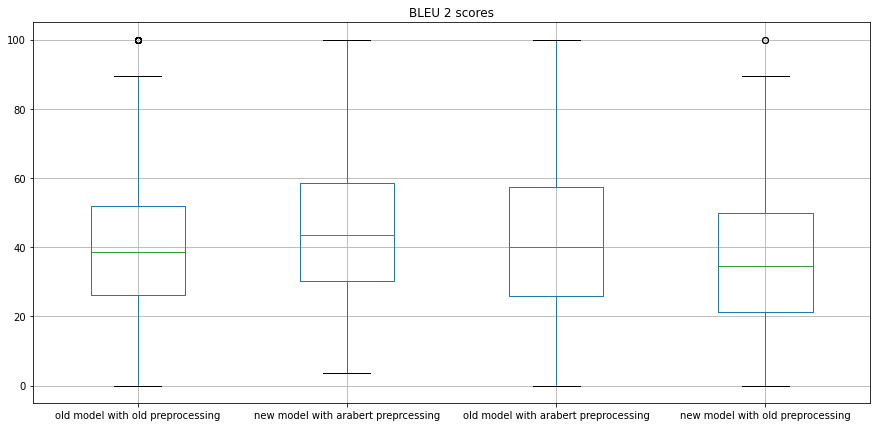

100%|██████████| 975/975 [04:01<00:00,  4.03it/s]


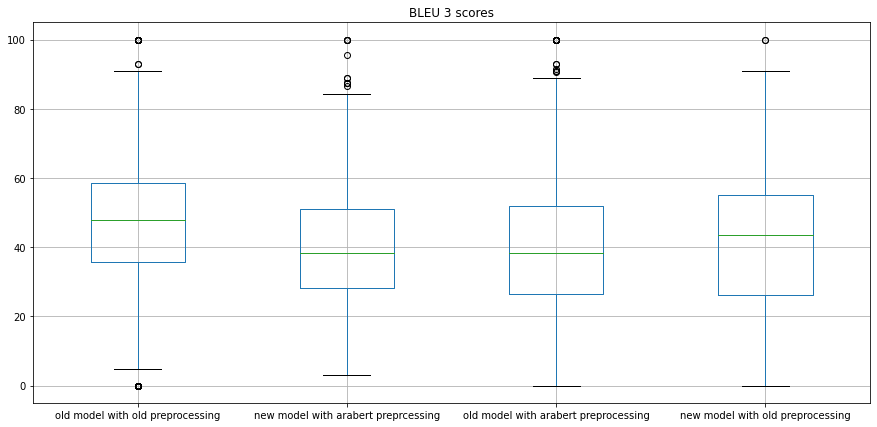

100%|██████████| 975/975 [04:03<00:00,  4.01it/s]


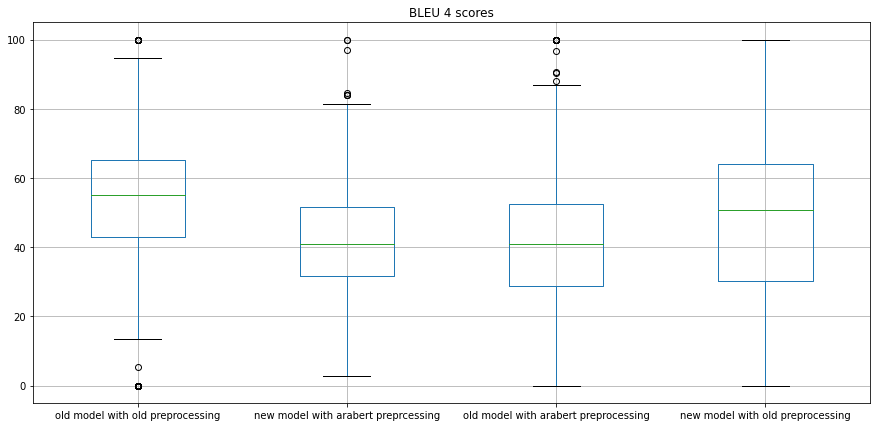

In [60]:
# bs
for b in range(4):
  om_op_b1s = []
  nm_ap_b1s = []
  om_ap_b1s = []
  nm_op_b1s = []
  for i in tqdm(range(full_df.shape[0])):
    output = calculate_scores(full_df.iloc[i], DF_PATH, manu=True)
    om_op_b1s.append(output[b+1][0])
    nm_ap_b1s.append(output[b+1][1])
    om_ap_b1s.append(output[b+1][2])
    nm_op_b1s.append(output[b+1][3])
  bs = pd.DataFrame({'old model with old preprocessing': om_op_b1s, 'new model with arabert preprcessing': nm_ap_b1s, 'old model with arabert preprocessing': om_ap_b1s, 'new model with old preprocessing': nm_op_b1s})
  bs.boxplot(figsize=(15, 7))
  plt.title(f'BLEU {b+1} scores')
  plt.show()